In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
from scipy import stats
sns.plt = plt
np.random.seed(1) # No estoy seguro si es necesario


In [2]:
df = pd.read_csv('tiempos.txt', sep=' ')

print(df.describe())

print(df.to_string(index=False))


          Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
count  12.000000   12.000000       12.000000      12.000000
mean    6.500000   13.908333       13.866667      33.158333
std     3.605551    2.025949        1.789024      49.079332
min     1.000000   11.000000       11.300000      18.200000
25%     3.750000   12.150000       12.475000      18.775000
50%     6.500000   14.400000       14.100000      19.050000
75%     9.250000   15.350000       14.950000      19.250000
max    12.000000   17.000000       16.700000     189.000000
Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
     1        11.1            11.3           19.4
     2        13.0            12.8           18.2
     3        16.1            16.0           19.0
     4        14.5            14.1           18.9
     5        12.0            12.5           19.1
     6        11.0            11.6           18.7
     7        15.1            14.6          189.0
     8        14.4            14.2           19.9
     9    

/home/brian/Documents/facultad/cienciadatos/venv/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


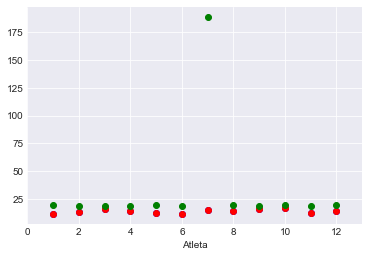

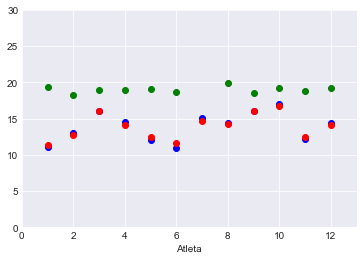

In [3]:
df = pd.read_csv('tiempos.txt', sep=' ')
sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")
plt.show()

sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")

LLUVIA_LIMIT = 30
sns.plt.ylim((0,LLUVIA_LIMIT))
sns.plt.show()

df2 = df[df['tiempo_lluvia'] < LLUVIA_LIMIT]


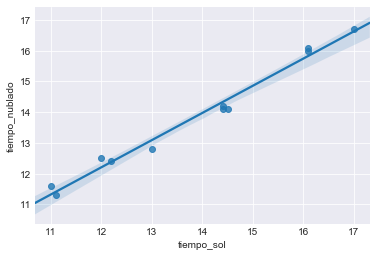

(0.99224199979513195, 1.8469595486418115e-09)
Ttest_relResult(statistic=1.600386423731163e-15, pvalue=0.99999999999999878)
-0.0416666666667
52100
0.521


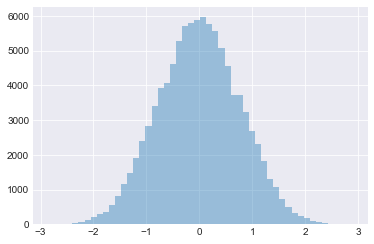

In [4]:
# RTA a : El cielo nublado no influye en los tiempos de los atletas.

# Ver 1: cuando esta nublado, los datos varian de forma similar a cuando hay sol

sns.regplot(x=df2['tiempo_sol'], y=df2['tiempo_nublado'])
sns.plt.show()

# Ver 2: hay una correlacion lineal alta entre los datos de cielo nublado y soleado

print(stats.pearsonr(df2['tiempo_sol'],df2['tiempo_nublado']))

# Ver 3: como las muestras estan relacionadas, usamos un test para ver si muestras EMPARENTADAS tienen la misma media

print(stats.ttest_rel(df2['tiempo_sol'],df2['tiempo_nublado']))

# Como el p-valor es muy grande, no podemos descartar que tengan la misma media

# Ver 4: Usamos un test de permutaciones para ver si las muestras fueron sacadas de la misma distribucion
# Hipotesis nula: las variables vienen de la misma distribucion
# Si alpha=0.05 (nivel de significacion 95%), podemos descartar que vengan de la misma distribucion si el p-valor
# es mayor a 0.95.

# Creo numpy array con datos soleados y datos de lluvia sin outlier en tuplas indicando su grupo
datos_sol = df['tiempo_sol']
datos_nublado = df['tiempo_nublado']

delta_0 = np.average(datos_nublado) - np.average(datos_sol)
print(delta_0)

datos_bool =  np.concatenate([np.zeros(datos_nublado.size, dtype=bool),np.ones(datos_sol.size, dtype=bool)])
datos_val = np.concatenate([datos_sol,datos_nublado])

PERM_COUNT = 100000

def simulate():
    perm = np.random.permutation(datos_bool)
    ll_sum = 0
    ll_count = 0
    s_sum = 0
    s_count = 0
    for is_soleado, val in zip(perm, datos_val):
        if is_soleado:
            s_count += 1
            s_sum += val
        else:
            ll_count += 1
            ll_sum += val
    return (ll_sum/ll_count) - (s_sum/s_count)
        
deltas = np.array([simulate() for i in range(PERM_COUNT)])
reject_delta_count = len(filter(lambda x: x > delta_0, deltas))
print(reject_delta_count)
print(float(reject_delta_count)/PERM_COUNT)


sns.distplot(deltas, kde=False, rug=False)
sns.plt.show()

# Como el p-valor no es lo suficientemente grande, no podemos descartar que vengan de la misma distribucion.

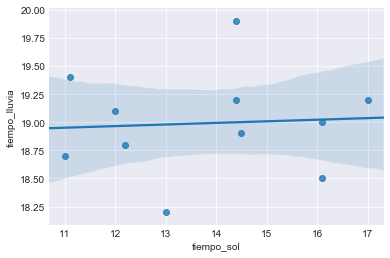

(0.064963553876733887, 0.84949358072453474)
WilcoxonResult(statistic=0.0, pvalue=0.0033456181158508813)
5.19090909091
4.71818181818
0
0.0


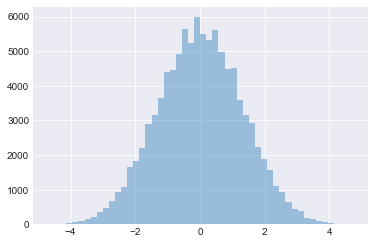

In [5]:
# Respuesta a : La velocidad en dias de lluvia es independiente del atleta

# Ver 1: los atletas rinden acordemente bajo sol a cuando hay cielo nublado.
# Esto es importante porque podria ser que los atletas rindan muy bien debido al sol,
# y que lo raro sea como rinden en buenas condiciones climaticas. Pero si rinden parecido bajo sol y nublado
# pero de manera distinta bajo lluvia, el problema seria la lluvia.
# Esto se vio antes.

# Ver 2: predecir el rendimiento de los atletas segun los datos de los dias que llueve
# produce malos estimadores para los dias soleados

sns.regplot(x=df2['tiempo_sol'], y=df2['tiempo_lluvia'])
sns.plt.show()

# Ver 3: la correlacion lineal es muy baja si comparamos los dias que llueve a los dias soleados

print(stats.pearsonr(df2['tiempo_sol'],df2['tiempo_lluvia']))

# Ver 4: segun el test 'Wilcoxon rank-sum', es poco probable que las muestras vengan de la misma distribucion

print(stats.wilcoxon(df2['tiempo_sol'],df2['tiempo_lluvia']))

# Explicacion: este test toma como Hipotesis nula que las dos muestras vienen de 
# distribuciones simetricas con respecto a 0.
# Como podemos ver, el p-valor obtenido es increiblemente bajo. Lo que quiere decir que es altamente
# probable que la hipotesis nula sea falsa.
# Mas precisamente, la podemos rechazar con nivel de significacion mayor a 95%.

# Ver 5: segun test de permutaciones, podemos rechazar que vengan de la misma distribucion
# Como vemos, en ninguna permutacion, la diferencia entre los tiempos de lluvia y tiempos bajo sol
# es tan grande como la original.

# Creo numpy array con datos soleados y datos de lluvia sin outlier en tuplas indicando su grupo
datos_sol = df2['tiempo_sol']
datos_lluvia = df2['tiempo_lluvia']

delta_0 = np.average(datos_lluvia) - np.average(datos_sol)
print(delta_0)

datos_bool =  np.concatenate([np.zeros(datos_lluvia.size, dtype=bool),np.ones(datos_sol.size, dtype=bool)])
datos_val = np.concatenate([datos_sol,datos_lluvia])

PERM_COUNT = 100000

def simulate():
    perm = np.random.permutation(datos_bool)
    ll_sum = 0
    ll_count = 0
    s_sum = 0
    s_count = 0
    for is_soleado, val in zip(perm, datos_val):
        if is_soleado:
            s_count += 1
            s_sum += val
        else:
            ll_count += 1
            ll_sum += val
    return (ll_sum/ll_count) - (s_sum/s_count)
        
deltas = np.array([simulate() for i in range(PERM_COUNT)])
reject_delta_count = len(filter(lambda x: x > delta_0, deltas))
print(max(deltas))
print(reject_delta_count)
print(float(reject_delta_count)/PERM_COUNT)


sns.distplot(deltas, kde=False, rug=False)
sns.plt.show()

In [6]:
# Respuesta a : Los atletas son m´as lentos en d´ıas de lluvia que en d´ıas soleados.

# Ya vimos que son independientes.

# Como las velocidades de los atletas los dias de lluvia y soleados NO estan relacionadas, usamos este test.
# Hipotesis nula: las muestras vienen de variables con la misma media.

print(stats.ttest_ind(df2['tiempo_sol'],df2['tiempo_lluvia']))

# p-valor muy chico = podemos rechazar que vienen de variables con la misma media.


Ttest_indResult(statistic=-8.0544058118901383, pvalue=1.0496102580688853e-07)


In [7]:
# El clima influye en la velocidad de los atletas
#Claramente si,  no sabemos como hacerlo

print(stats.f_oneway(df2['tiempo_sol'],df2['tiempo_nublado'], df2['tiempo_lluvia']))

# Tenemos suficiente evidencia para rechazar la hipotesis nula de que las medias son iguales. 
# Es decir que concluimos que las medias para tiempo soleado, tiempo nublado y tiempo de lluvia son distintas.

# Notar que utilizamos un test que no utiliza la hipotesis de que apareamiento entre los dias.
# Es decir, no importó que hayamos tomado muestras de soleado nublado y lluvia para mismos corredores.
# Aun asi, tuvimos suficiente evidencia para rechazar la hipotesis nula


F_onewayResult(statistic=36.907516413855539, pvalue=8.1830487111034126e-09)
